# Parallel Coordinate Plot: Real Case Example -- Mean Climate

- Generate a static image of Parallel coordinate plot using Matplotlib, for mean climate metrics.
- Author: Jiwoo Lee (2021-07)
- Last update: 2024-03

## 1. Read data from JSON files

Input data for parallel coordinate plot is expected as a set a (stacked or list of) 2-d numpy array(s) with list of strings for x and y axes labels. 

### 1.1 Provide PMP output JSON files

In [1]:
import glob
import os
import numpy as np
import requests

PMP output files downloadable from the [PMP results archive](https://github.com/PCMDI/pcmdi_metrics_results_archive). 

In [2]:
vars = ['pr', 'prw', 'psl', 'rlds', 'rltcre', 'rlus', 'rlut', 'rlutcs', 'rsds', 'rsdscs', 'rsdt', 'rstcre', 'rsut', 'rsutcs', 'sfcWind', 
        'ta-200', 'ta-850', 'tas', 'tauu', 'ts', 'ua-200', 'ua-850', 'va-200', 'va-850', 'zg-500']

mip = "cmip6"
exp = "historical"
data_version = "v20230823"
json_dir = './json_files'

os.makedirs(json_dir, exist_ok=True)

for var in vars:
    url = "https://raw.githubusercontent.com/PCMDI/pcmdi_metrics_results_archive/main/" + \
          "metrics_results/mean_climate/"+mip+"/"+exp+"/"+data_version+"/"+var+"."+mip+"."+exp+".regrid2.2p5x2p5."+data_version+".json"
    r = requests.get(url, allow_redirects=True)
    filename = os.path.join(json_dir, url.split('/')[-1])
    with open(filename, 'wb') as file:
        file.write(r.content)
    print('Download completed:', filename)

Download completed: ./json_files/pr.cmip6.historical.regrid2.2p5x2p5.v20230823.json
Download completed: ./json_files/prw.cmip6.historical.regrid2.2p5x2p5.v20230823.json
Download completed: ./json_files/psl.cmip6.historical.regrid2.2p5x2p5.v20230823.json
Download completed: ./json_files/rlds.cmip6.historical.regrid2.2p5x2p5.v20230823.json
Download completed: ./json_files/rltcre.cmip6.historical.regrid2.2p5x2p5.v20230823.json
Download completed: ./json_files/rlus.cmip6.historical.regrid2.2p5x2p5.v20230823.json
Download completed: ./json_files/rlut.cmip6.historical.regrid2.2p5x2p5.v20230823.json
Download completed: ./json_files/rlutcs.cmip6.historical.regrid2.2p5x2p5.v20230823.json
Download completed: ./json_files/rsds.cmip6.historical.regrid2.2p5x2p5.v20230823.json
Download completed: ./json_files/rsdscs.cmip6.historical.regrid2.2p5x2p5.v20230823.json
Download completed: ./json_files/rsdt.cmip6.historical.regrid2.2p5x2p5.v20230823.json
Download completed: ./json_files/rstcre.cmip6.histor

Uncompress PMP output archive file

Check JSON files

In [3]:
json_list = sorted(glob.glob(os.path.join(json_dir, '*' + mip + '*' + data_version + '.json')))
for json_file in json_list:
    print(json_file.split('/')[-1])

pr.cmip6.historical.regrid2.2p5x2p5.v20230823.json
prw.cmip6.historical.regrid2.2p5x2p5.v20230823.json
psl.cmip6.historical.regrid2.2p5x2p5.v20230823.json
rlds.cmip6.historical.regrid2.2p5x2p5.v20230823.json
rltcre.cmip6.historical.regrid2.2p5x2p5.v20230823.json
rlus.cmip6.historical.regrid2.2p5x2p5.v20230823.json
rlut.cmip6.historical.regrid2.2p5x2p5.v20230823.json
rlutcs.cmip6.historical.regrid2.2p5x2p5.v20230823.json
rsds.cmip6.historical.regrid2.2p5x2p5.v20230823.json
rsdscs.cmip6.historical.regrid2.2p5x2p5.v20230823.json
rsdt.cmip6.historical.regrid2.2p5x2p5.v20230823.json
rstcre.cmip6.historical.regrid2.2p5x2p5.v20230823.json
rsut.cmip6.historical.regrid2.2p5x2p5.v20230823.json
rsutcs.cmip6.historical.regrid2.2p5x2p5.v20230823.json
sfcWind.cmip6.historical.regrid2.2p5x2p5.v20230823.json
ta-200.cmip6.historical.regrid2.2p5x2p5.v20230823.json
ta-850.cmip6.historical.regrid2.2p5x2p5.v20230823.json
tas.cmip6.historical.regrid2.2p5x2p5.v20230823.json
tauu.cmip6.historical.regrid2.2p5x

### 1.2 Extract data from JSON files <a name="extract"></a>

Use `Metrics` class (that use `read_mean_clim_json_files` function underneath) to extract data from the above JSON files.

#### Parameters
- `json_list`: list of string, where each element is for path/file for PMP output JSON files

#### Returned object includes
- `df_dict`: dictionary that has `[stat][season][region]` hierarchy structure storing pandas dataframe for metric numbers (Rows: models, Columns: variables (i.e., 2d array)
- `var_list`: list of string, all variables from JSON files
- `var_unit_list`: list of string, all variables and its units from JSON files
- `var_ref_dict`: dictonary for reference dataset used for each variable
- `regions`: list of string, regions
- `stats`: list of string, statistics

In [4]:
from pcmdi_metrics.graphics import Metrics

In [5]:
library = Metrics(json_list)

In [6]:
df_dict = library.df_dict
var_list = library.var_list
var_unit_list = library.var_unit_list
regions = library.regions
stats = library.stats

In [7]:
print('var_list:', var_list)
print('var_unit_list:', var_unit_list)
print("len(var_list:", len(var_list))
print('regions:', regions)
print('stats:', stats)

var_list: ['pr', 'prw', 'psl', 'rlds', 'rltcre', 'rlus', 'rlut', 'rlutcs', 'rsds', 'rsdscs', 'rsdt', 'rstcre', 'rsut', 'rsutcs', 'sfcWind', 'ta-200', 'ta-850', 'tas', 'tauu', 'ts', 'ua-200', 'ua-850', 'va-200', 'va-850', 'zg-500']
var_unit_list: ['pr [kg m-2 s-1]', 'prw [kg m-2]', 'psl [Pa]', 'rlds [W m-2]', 'rltcre [W m-2]', 'rlus [W m-2]', 'rlut [W m-2]', 'rlutcs [W m-2]', 'rsds [W m-2]', 'rsdscs [W m-2]', 'rsdt [W m-2]', 'rstcre [W m-2]', 'rsut [W m-2]', 'rsutcs [W m-2]', 'sfcWind [m s-1]', 'ta-200 [K]', 'ta-850 [K]', 'tas [K]', 'tauu [Pa]', 'ts [K]', 'ua-200 [m s-1]', 'ua-850 [m s-1]', 'va-200 [m s-1]', 'va-850 [m s-1]', 'zg-500 [m]']
len(var_list: 25
regions: ['SHEX_ocean', 'NHEX_land', 'ocean', 'NHEX', 'TROPICS', 'ocean_SHEX', 'land_NHEX', 'SHEX', 'SHEX_land', 'ocean_50S50N', 'global', 'land', 'NHEX_ocean']
stats: ['bias_xy', 'cor_xy', 'mae_xy', 'mean-obs_xy', 'mean_xy', 'rms_devzm', 'rms_xy', 'rms_xyt', 'rms_y', 'rmsc_xy', 'std-obs_xy', 'std-obs_xy_devzm', 'std-obs_xyt', 'std_xy

In [8]:
df_dict['rms_xyt']['ann']['global']

,model,run,model_run,pr,prw,psl,rlds,rltcre,rlus,rlut,...,ta-200,ta-850,tas,tauu,ts,ua-200,ua-850,va-200,va-850,zg-500
0,ACCESS-CM2,r1i1p1f1,ACCESS-CM2_r1i1p1f1,1.949,126.951,267.209,13.464,9.509,10.893,12.794,...,2.803,1.616,2.237,0.038,2.368,4.969,1.557,2.097,0.961,26.936
1,ACCESS-ESM1-5,r1i1p1f1,ACCESS-ESM1-5_r1i1p1f1,1.911,127.011,263.105,10.953,8.150,10.449,12.022,...,2.383,1.294,1.931,0.035,2.049,4.467,1.624,2.151,0.989,27.823
2,AWI-CM-1-1-MR,r1i1p1f1,AWI-CM-1-1-MR_r1i1p1f1,1.758,127.072,223.345,11.130,8.484,8.574,9.879,...,2.048,1.182,1.425,0.029,1.567,3.282,1.422,1.986,0.888,21.041
3,AWI-ESM-1-1-LR,r1i1p1f1,AWI-ESM-1-1-LR_r1i1p1f1,2.021,127.125,249.276,14.488,9.693,12.189,12.794,...,3.767,2.116,1.915,0.034,2.220,4.433,1.825,2.295,1.061,NaN
4,BCC-CSM2-MR,r1i1p1f1,BCC-CSM2-MR_r1i1p1f1,1.863,127.155,316.509,13.636,8.158,11.373,11.124,...,2.457,1.818,2.520,0.037,2.340,4.853,1.974,2.215,1.146,30.647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,NorESM2-MM,r1i1p1f1,NorESM2-MM_r1i1p1f1,1.204,127.056,223.097,11.446,6.701,9.952,8.217,...,NaN,NaN,1.759,0.030,1.967,3.538,1.467,NaN,0.931,21.945
61,SAM0-UNICON,r1i1p1f1,SAM0-UNICON_r1i1p1f1,1.612,126.982,226.741,13.173,9.219,10.983,11.228,...,3.753,1.444,2.368,0.035,2.512,3.689,1.729,2.170,0.952,24.147
62,TaiESM1,r1i1p1f1,TaiESM1_r1i1p1f1,1.562,126.969,233.954,11.386,8.617,9.574,9.703,...,NaN,NaN,2.027,0.040,2.207,NaN,1.618,NaN,0.895,NaN
63,UKESM1-0-LL,r1i1p1f2,UKESM1-0-LL_r1i1p1f2,1.749,126.845,256.131,13.240,8.769,10.714,10.896,...,NaN,NaN,2.237,0.033,2.346,3.757,1.404,1.905,0.882,NaN


In [9]:
# Simple re-order variables
if 'zg-500' in var_list and 'sfcWind' in var_list:
    var_list.remove('zg-500')
    idx_sfcWind = var_list.index('sfcWind')
    var_list.insert(idx_sfcWind+1, 'zg-500')
    
if 'ta-850' in var_list:
    var_list.remove('ta-850')

print("var_list:", var_list)
print("len(var_list:", len(var_list))

var_list: ['pr', 'prw', 'psl', 'rlds', 'rltcre', 'rlus', 'rlut', 'rlutcs', 'rsds', 'rsdscs', 'rsdt', 'rstcre', 'rsut', 'rsutcs', 'sfcWind', 'zg-500', 'ta-200', 'tas', 'tauu', 'ts', 'ua-200', 'ua-850', 'va-200', 'va-850']
len(var_list: 24


In [10]:
data = df_dict['rms_xyt']['ann']['global'][var_list].to_numpy()
model_names = df_dict['rms_xyt']['ann']['global']['model'].tolist()
#metric_names = ['\n['.join(var_unit.split(' [')) for var_unit in var_unit_list]
metric_names = var_list
models_to_highlight = ['E3SM-1-0', 'E3SM-1-1', 'E3SM-1-1-ECA', 'E3SM-2-0']
print('data.shape:', data.shape)
print('len(metric_names): ', len(metric_names))
print('len(model_names): ', len(model_names))

data.shape: (65, 24)
len(metric_names):  24
len(model_names):  65


In [11]:
units_all = 'prw [kg m-2], pr [mm d-1], psl [Pa], rlds [W m-2], rsdscs [W m-2], rltcre [W m-2], rlus [W m-2], rlut [W m-2], rlutcs [W m-2], rsds [W m-2], rsdt [W m-2], rstcre [W m-2], rsus [W m-2], rsut [W m-2], rsutcs [W m-2], sfcWind [m s-1], zg-500 [m], ta-200 [K], ta-850 [K], tas [K], ts [K], ua-200 [m s-1], ua-850 [m s-1], uas [m s-1], va-200 [m s-1], va-850 [m s-1], vas [m s-1], tauu [Pa]'
units_all.split(', ')
var_unit_list = [] 

for var in var_list:
    found = False
    for var_units in units_all.split(', '):
        tmp1 = var_units.split(' [')[0]
        #print(var, tmp1)
        if tmp1 == var:
            unit = '[' + var_units.split(' [')[1]
            var_unit_list.append(var + '\n' + unit)
            found = True
            break
    if found is False:
        print(var, 'not found')

print('var_unit_list:', var_unit_list)

metric_names = var_unit_list

var_unit_list: ['pr\n[mm d-1]', 'prw\n[kg m-2]', 'psl\n[Pa]', 'rlds\n[W m-2]', 'rltcre\n[W m-2]', 'rlus\n[W m-2]', 'rlut\n[W m-2]', 'rlutcs\n[W m-2]', 'rsds\n[W m-2]', 'rsdscs\n[W m-2]', 'rsdt\n[W m-2]', 'rstcre\n[W m-2]', 'rsut\n[W m-2]', 'rsutcs\n[W m-2]', 'sfcWind\n[m s-1]', 'zg-500\n[m]', 'ta-200\n[K]', 'tas\n[K]', 'tauu\n[Pa]', 'ts\n[K]', 'ua-200\n[m s-1]', 'ua-850\n[m s-1]', 'va-200\n[m s-1]', 'va-850\n[m s-1]']


In [12]:
df_dict['rms_xyt']['ann']['global'][var_list].columns

Index(['pr', 'prw', 'psl', 'rlds', 'rltcre', 'rlus', 'rlut', 'rlutcs', 'rsds',
       'rsdscs', 'rsdt', 'rstcre', 'rsut', 'rsutcs', 'sfcWind', 'zg-500',
       'ta-200', 'tas', 'tauu', 'ts', 'ua-200', 'ua-850', 'va-200', 'va-850'],
      dtype='object')

## 2. Plot

In [13]:
from pcmdi_metrics.graphics import parallel_coordinate_plot

Parameters
----------
- `data`: 2-d numpy array for metrics
- `metric_names`: list, names of metrics for individual vertical axes (axis=1)
- `model_names`: list, name of models for markers/lines (axis=0)
- `models_to_highlight`: list, default=None, List of models to highlight as lines or marker
- `models_to_highlight_by_line`: bool, default=True, highlight as lines. If False, as marker
- `models_to_highlight_colors`: list, default=None, List of colors for models to highlight as lines
- `models_to_highlight_labels`: list, default=None, List of string labels for models to highlight as lines
- `models_to_highlight_markers`: list, matplotlib markers for models to highlight if as marker
- `models_to_highlight_markers_size`: float, size of matplotlib markers for models to highlight if as marker
- `fig`: `matplotlib.figure` instance to which the parallel coordinate plot is plotted.
            If not provided, use current axes or create a new one.  Optional.
- `ax`: `matplotlib.axes.Axes` instance to which the parallel coordinate plot is plotted.
        If not provided, use current axes or create a new one.  Optional.
- `figsize`: tuple (two numbers), default=(15,5), image size
- `show_boxplot`: bool, default=False, show box and wiskers plot
- `show_violin`: bool, default=False, show violin plot
- `violin_colors`: tuple or list containing two strings for colors of violin. Default=("lightgrey", "pink")
- `violin_label`: string to label the violin plot, when violin plot is not splited. Default is None.
- `title`: string, default=None, plot title
- `identify_all_models`: bool, default=True. Show and identify all models using markers
- `xtick_labelsize`: number, fontsize for x-axis tick labels (optional)
- `ytick_labelsize`: number, fontsize for x-axis tick labels (optional)
- `colormap`: string, default='viridis', matplotlib colormap
- `num_color`: integer, default=20, how many color to use.
- `legend_off`: bool, default=False, turn off legend
- `legend_ncol`: integer, default=6, number of columns for legend text
- `legend_bbox_to_anchor`: tuple, defulat=(0.5, -0.14), set legend box location
- `legend_loc`: string, default="upper center", set legend box location
- `legend_fontsize`: float, default=8, legend font size
- `logo_rect`: sequence of float. The dimensions [left, bottom, width, height] of the new Axes.
                All quantities are in fractions of figure width and height.  Optional.
- `logo_off`: bool, default=False, turn off PMP logo
- `model_names2`: list of string, should be a subset of `model_names`.  If given, violin plot will be split into 2 groups. Optional.
- `group1_name`: string, needed for violin plot legend if splited to two groups, for the 1st group. Default is 'group1'.
- `group2_name`: string, needed for violin plot legend if splited to two groups, for the 2nd group. Default is 'group2'.
- `comparing_models`: tuple or list containing two strings for models to compare with colors filled between the two lines.
- `fill_between_lines`: bool, default=False, fill color between lines for models in comparing_models
- `fill_between_lines_colors`: tuple or list containing two strings of colors for filled between the two lines. Default=('red', 'green')
- `arrow_between_lines`: bool, default=False, place arrows between two lines for models in comparing_models
- `arrow_between_lines_colors`: tuple or list containing two strings of colors for arrow between the two lines. Default=('red', 'green')
- `arrow_alpha`: float, default=1, transparency of arrow (faction between 0 to 1)
- `vertical_center`: string ("median", "mean")/float/integer, default=None, adjust range of vertical axis to set center of vertical axis as median, mean, or given number
- `vertical_center_line`: bool, default=False, show median as line
- `vertical_center_line_label`: str, default=None, label in legend for the horizontal vertical center line. If not given, it will be automatically assigned. It can be turned off by "off"
- `ymax`: int or float, default=None, specify value of vertical axis top
- `ymin`: int or float, default=None, specify value of vertical axis bottom

Return
------
- `fig`: matplotlib component for figure
- `ax`: matplotlib component for axis

Passed a quick QC
data.shape: (65, 24)
data.shape: (65, 24)


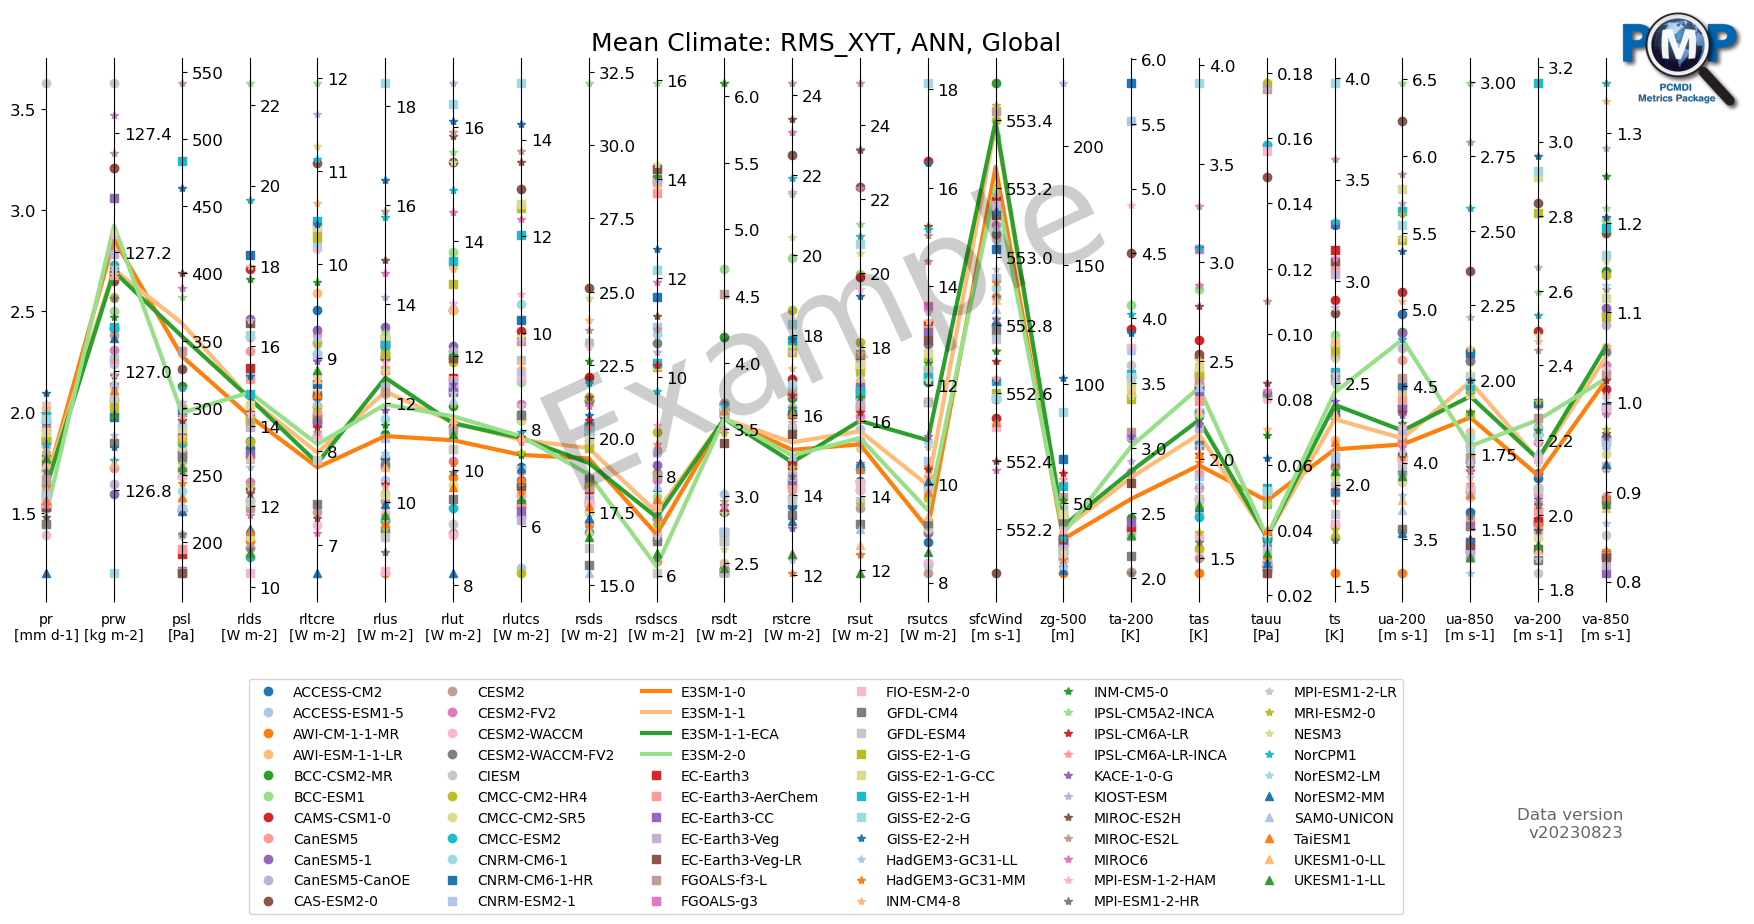

In [14]:
fig, ax = parallel_coordinate_plot(data, metric_names, model_names, models_to_highlight=models_to_highlight, 
                                   title='Mean Climate: RMS_XYT, ANN, Global', 
                                   figsize=(21, 7),
                                   colormap='tab20',
                                   xtick_labelsize=10,
                                   logo_rect=[0.8, 0.8, 0.15, 0.15])

fig.text(0.99, -0.45, 'Data version\n'+data_version, transform=ax.transAxes,
         fontsize=12, color='black', alpha=0.6, ha='right', va='bottom',)

# Save figure as an image file
fig.savefig('mean_clim_parallel_coordinate_plot_'+data_version+'.png', facecolor='w', bbox_inches='tight')

# Add Watermark
ax.text(0.5, 0.5, 'Example', transform=ax.transAxes,
        fontsize=100, color='black', alpha=0.2,
        ha='center', va='center', rotation=25)

# Save figure as an image file
fig.savefig('mean_clim_parallel_coordinate_plot_example.png', facecolor='w', bbox_inches='tight')